In [8]:
!unzip /content/train1.zip

Archive:  /content/train1.zip
   creating: train/
   creating: train/images/
  inflating: train/images/-2023-05-03-092932_png.rf.c05c993616c6354c7a2b37dedee3a92b.jpg  
  inflating: train/images/-2023-05-03-092932_png_jpg.rf.d29efb2693c06a8a2840a00632f64349.jpg  
  inflating: train/images/-2023-05-03-093043_png.rf.af3a697d3d836b52d2f9212db17a87a2.jpg  
  inflating: train/images/-2023-05-03-093043_png_jpg.rf.6eaace5ebdccd5655199732f03b9f1ed.jpg  
  inflating: train/images/-2023-05-03-093101_png.rf.56cace90add9463c6e1b150fd7ae1ee5.jpg  
  inflating: train/images/-2023-05-03-093101_png_jpg.rf.8c91b6868c39d72f711d60bd16712ace.jpg  
  inflating: train/images/-2023-05-03-094822_png.rf.c56d8499134289c0d6b2b865783b9357.jpg  
  inflating: train/images/00000020_jpg.rf.77989b7a8cb05131ae2261032b6d0bcf.jpg  
  inflating: train/images/00000020_jpg.rf.ed17cd89cc9ca71ec13521875dfd6860.jpg  
  inflating: train/images/00000190_jpg.rf.3d8cedb5cf3a6e130433e1136cf9711a.jpg  
  inflating: train/images/00000

In [ ]:
!pip install ultralytics

In [10]:
import os
import random
import shutil

# Config
src_img_dir = '/content/train/images'
src_lbl_dir = '/content/train/labels'
dst_img_dir = 'train_subset/images'
dst_lbl_dir = 'train_subset/labels'
num_samples = 1500

os.makedirs(dst_img_dir, exist_ok=True)
os.makedirs(dst_lbl_dir, exist_ok=True)

images = os.listdir(src_img_dir)
sampled = random.sample(images, num_samples)

for img_file in sampled:
    base = os.path.splitext(img_file)[0]
    lbl_file = base + '.txt'

    img_path = os.path.join(src_img_dir, img_file)
    lbl_path = os.path.join(src_lbl_dir, lbl_file)

    # ✅ Copy only if label file exists
    if os.path.exists(lbl_path):
        shutil.copy(img_path, os.path.join(dst_img_dir, img_file))
        shutil.copy(lbl_path, os.path.join(dst_lbl_dir, lbl_file))
    else:
        print(f"Label missing for {img_file}, skipping...")


In [14]:
files_in_folder = os.listdir("/content/train_subset/images")
number_of_files = len(files_in_folder)

print(f"There are {number_of_files} items in the directory: {dst_img_dir}")


There are 1500 items in the directory: train_subset/images


In [12]:
import os
print(os.listdir("/content/train_subset"))  # Check if 'images' is inside


['labels', 'images']


In [23]:
from ultralytics import YOLO

# Load a YOLOv8 model (YOLOv8s is small and fast)
model = YOLO('yolov8s.yaml')  # You can also use yolov8n.yaml for nano or yolov8m.yaml

model.train(
    data="data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    project='results',
    name='car_detection',
    exist_ok=True
)


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=car_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

train: Scanning /content/train_subset/labels.cache... 1500 images, 85 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 18423, len(boxes) = 29078. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 401.4±231.3 MB/s, size: 687.2 KB)


val: Scanning /content/valid/labels.cache... 558 images, 29 backgrounds, 0 corrupt: 100%|██████████| 558/558 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 8307, len(boxes) = 11950. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to results/car_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to results/car_detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.23G      3.433      2.697      3.683        158        640: 100%|██████████| 188/188 [00:47<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]


                   all        558      11950      0.338      0.401       0.33       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.52G      2.155      1.539      2.306         94        640: 100%|██████████| 188/188 [00:47<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]


                   all        558      11950      0.955      0.643      0.699      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.54G      1.707      1.204       1.88        134        640: 100%|██████████| 188/188 [00:47<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]


                   all        558      11950      0.923      0.655      0.757       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.56G       1.51       1.06      1.689        180        640: 100%|██████████| 188/188 [00:47<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.21it/s]


                   all        558      11950      0.908       0.72      0.809      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.56G      1.354     0.9943       1.58        188        640: 100%|██████████| 188/188 [00:46<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.24it/s]


                   all        558      11950        0.9      0.737      0.825      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.56G      1.287      0.934      1.537        134        640: 100%|██████████| 188/188 [00:46<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.50it/s]

                   all        558      11950      0.912      0.766      0.866      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.56G      1.187     0.9101      1.477         33        640: 100%|██████████| 188/188 [00:45<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]


                   all        558      11950      0.893      0.731      0.834      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.56G       1.13     0.8205      1.408         71        640: 100%|██████████| 188/188 [00:45<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]


                   all        558      11950      0.917      0.757       0.86      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.56G      1.078     0.7889      1.376        124        640: 100%|██████████| 188/188 [00:47<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]


                   all        558      11950       0.93      0.784      0.879       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.56G      1.059     0.7827      1.361        128        640: 100%|██████████| 188/188 [00:45<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]


                   all        558      11950       0.93      0.788      0.881      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.57G     0.9962      0.712      1.315        133        640: 100%|██████████| 188/188 [00:47<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.69it/s]

                   all        558      11950      0.908      0.785      0.875      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.59G     0.9828     0.7186      1.317        119        640: 100%|██████████| 188/188 [00:45<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.45it/s]


                   all        558      11950      0.914      0.803      0.895      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.59G     0.9675     0.7023      1.297        216        640: 100%|██████████| 188/188 [00:45<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]


                   all        558      11950      0.938      0.787      0.899      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.59G     0.9671     0.6867      1.291        136        640: 100%|██████████| 188/188 [00:45<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.64it/s]

                   all        558      11950      0.918      0.797       0.89      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.59G     0.9027     0.6666      1.266        110        640: 100%|██████████| 188/188 [00:45<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]


                   all        558      11950      0.916      0.817      0.913      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.59G     0.9104      0.663      1.268         71        640: 100%|██████████| 188/188 [00:45<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.48it/s]


                   all        558      11950      0.939      0.808      0.911      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.61G     0.9034     0.6587      1.262        249        640: 100%|██████████| 188/188 [00:46<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.63it/s]

                   all        558      11950      0.934      0.827       0.92      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.63G     0.8401     0.6193      1.216         83        640: 100%|██████████| 188/188 [00:45<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]


                   all        558      11950      0.939      0.824      0.917      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.63G     0.8509     0.6298      1.226        174        640: 100%|██████████| 188/188 [00:46<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.62it/s]


                   all        558      11950      0.934      0.847       0.92      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.63G     0.8093     0.5836      1.207        185        640: 100%|██████████| 188/188 [00:46<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.54it/s]


                   all        558      11950      0.914      0.832      0.928      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.63G     0.7927     0.5735      1.197        164        640: 100%|██████████| 188/188 [00:44<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.48it/s]


                   all        558      11950      0.922      0.833      0.924      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.63G     0.8163     0.5798      1.202         89        640: 100%|██████████| 188/188 [00:45<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.38it/s]

                   all        558      11950      0.903      0.878      0.939      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.63G     0.8271     0.5898      1.213        125        640: 100%|██████████| 188/188 [00:47<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.45it/s]

                   all        558      11950      0.915      0.856      0.934      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.63G     0.8077     0.5752      1.202        174        640: 100%|██████████| 188/188 [00:46<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.52it/s]

                   all        558      11950      0.914      0.884      0.942      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.63G     0.8033     0.5665      1.203         36        640: 100%|██████████| 188/188 [00:46<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        558      11950      0.906      0.861      0.935      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.63G     0.7784     0.5589      1.186         76        640: 100%|██████████| 188/188 [00:46<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]


                   all        558      11950      0.922      0.852       0.94      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.63G     0.7665     0.5513      1.177         95        640: 100%|██████████| 188/188 [00:45<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]

                   all        558      11950      0.892      0.881      0.936      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.63G     0.7712     0.5572      1.177        110        640: 100%|██████████| 188/188 [00:46<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        558      11950      0.938      0.841      0.935      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.64G      0.716     0.5196      1.141        113        640: 100%|██████████| 188/188 [00:46<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.38it/s]

                   all        558      11950      0.917      0.895      0.948      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.66G     0.7147     0.5242       1.15        125        640: 100%|██████████| 188/188 [00:45<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.36it/s]

                   all        558      11950      0.919      0.893      0.949      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.66G     0.7347     0.5208      1.153        161        640: 100%|██████████| 188/188 [00:47<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.58it/s]

                   all        558      11950      0.924      0.899      0.951      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.66G     0.7112     0.5053      1.149        188        640: 100%|██████████| 188/188 [00:46<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]

                   all        558      11950      0.908      0.901      0.952      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.66G     0.6974      0.497      1.141         61        640: 100%|██████████| 188/188 [00:45<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.60it/s]

                   all        558      11950      0.898      0.891      0.948      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.66G     0.7288      0.507      1.156        237        640: 100%|██████████| 188/188 [00:46<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.66it/s]

                   all        558      11950      0.906      0.899      0.952      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.66G     0.6699     0.4757      1.124        176        640: 100%|██████████| 188/188 [00:45<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.60it/s]

                   all        558      11950      0.927      0.899      0.954      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.66G     0.7082      0.496      1.155         95        640: 100%|██████████| 188/188 [00:45<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.49it/s]

                   all        558      11950      0.923      0.909      0.956      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.66G     0.6868     0.4846       1.13         53        640: 100%|██████████| 188/188 [00:46<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.70it/s]


                   all        558      11950      0.907      0.907      0.954      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.66G     0.6783     0.4835      1.128         42        640: 100%|██████████| 188/188 [00:45<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        558      11950       0.92      0.903      0.954      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.66G     0.7052      0.492       1.14        210        640: 100%|██████████| 188/188 [00:46<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.37it/s]

                   all        558      11950        0.9      0.897      0.949      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.67G       0.64      0.464      1.093        100        640: 100%|██████████| 188/188 [00:46<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.95it/s]

                   all        558      11950      0.921      0.911      0.958      0.822


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.68G     0.7161     0.5039      1.197        121        640: 100%|██████████| 188/188 [00:45<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.47it/s]

                   all        558      11950      0.924      0.899      0.954      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.68G     0.7295     0.5159      1.195        124        640: 100%|██████████| 188/188 [00:43<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.52it/s]

                   all        558      11950      0.932      0.904      0.956       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.68G     0.7242     0.5019      1.203         81        640: 100%|██████████| 188/188 [00:43<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        558      11950      0.928      0.915      0.958      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.68G     0.7153     0.4945      1.207         24        640: 100%|██████████| 188/188 [00:42<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]

                   all        558      11950      0.931      0.914       0.96      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.68G     0.6869     0.4856      1.156         68        640: 100%|██████████| 188/188 [00:42<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.38it/s]


                   all        558      11950      0.928      0.913      0.959      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.68G     0.7047     0.4761      1.178         73        640: 100%|██████████| 188/188 [00:42<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.47it/s]

                   all        558      11950      0.913      0.906      0.955      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.68G     0.6602     0.4581      1.162         70        640: 100%|██████████| 188/188 [00:42<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.54it/s]

                   all        558      11950      0.927      0.917      0.961      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.68G     0.6601     0.4481      1.166         10        640: 100%|██████████| 188/188 [00:43<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.69it/s]

                   all        558      11950      0.927      0.922      0.962      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.68G     0.6499     0.4424      1.141         72        640: 100%|██████████| 188/188 [00:42<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.70it/s]

                   all        558      11950      0.937      0.913      0.962      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.68G     0.6389     0.4457      1.138        181        640: 100%|██████████| 188/188 [00:42<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.65it/s]

                   all        558      11950      0.934      0.916      0.963      0.836



50 epochs completed in 0.782 hours.
Optimizer stripped from results/car_detection/weights/last.pt, 22.5MB
Optimizer stripped from results/car_detection/weights/best.pt, 22.5MB

Validating results/car_detection/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17<00:00,  2.00it/s]


                   all        558      11950      0.927      0.922      0.962      0.837
                 empty        503       3650      0.888      0.898      0.944      0.779
              occupied        484       8300      0.966      0.946       0.98      0.895
Speed: 0.3ms preprocess, 4.5ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to results/car_detection


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ee0bc698210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [22]:
!zip -r /content/runs1527.zip /content/runs1527


  adding: content/runs1527/ (stored 0%)
  adding: content/runs1527/.zip (stored 0%)
  adding: content/runs1527/detect/ (stored 0%)
  adding: content/runs1527/detect/image_inference3/ (stored 0%)
  adding: content/runs1527/detect/image_inference3/image1.jpg (deflated 2%)
  adding: content/runs1527/detect/image_inference3/labels/ (stored 0%)
  adding: content/runs1527/detect/image_inference3/labels/image3.txt (deflated 45%)
  adding: content/runs1527/detect/image_inference3/labels/image1.txt (deflated 58%)
  adding: content/runs1527/detect/image_inference3/.ipynb_checkpoints/ (stored 0%)
  adding: content/runs1527/detect/image_inference/ (stored 0%)
  adding: content/runs1527/detect/image_inference/.ipynb_checkpoints/ (stored 0%)
  adding: content/runs1527/detect/.ipynb_checkpoints/ (stored 0%)
  adding: content/runs1527/detect/image_inference2/ (stored 0%)
  adding: content/runs1527/detect/image_inference2/labels/ (stored 0%)
  adding: content/runs1527/detect/image_inference2/labels/.ip

In [23]:
from google.colab import files
files.download('/content/runs1527.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from ultralytics import YOLO
model = YOLO('/content/content/results_parkvideo/car_detection/weights/best.pt')

# Evaluate on test set
# metrics = model.val(data='data.yaml', split='test')

# # View mAP, precision, recall
# print(metrics)

#prediction on Videos

In [28]:
model.predict(
    source="parking1.mp4",  # 🔁 Your video file path
    conf=0.5,                    # Confidence threshold
    save=True,                   # Save output video
    save_txt=True,              # Save predictions in .txt format
    project="results",          # Output folder
    name="video_inference",     # Subfolder for this prediction
    imgsz=640                   # Image resolution
)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/189) /content/parking1.mp4: 384x640 7 emptys, 1 occupied, 41.5ms
video 1/1 (frame 2/189) /content/parking1.mp4: 384x640 7 emptys, 1 occupied, 10.8ms
video 1/1 (frame 3/189) /content/parking1.mp4: 384x640 7 emptys, 1 occupied, 10.8ms
video 1/1 (frame 4/189) /content/parking1.mp4: 384x640 7 emptys, 10.7ms
video 1/1 (frame 5/189) /content/parking1.mp4: 384x640 7 emptys, 12.1ms
video 1/1 (frame 6/189) /content/parking1.mp4: 384x640 7 emp

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'empty', 1: 'occupied'}
 obb: None
 orig_img: array([[[ 69,  42,  47],
         [ 87,  60,  65],
         [102,  70,  76],
         ...,
         [ 90,  79,  76],
         [ 74,  67,  64],
         [ 57,  50,  47]],
 
        [[ 95,  68,  73],
         [116,  89,  94],
         [137, 105, 111],
         ...,
         [128, 117, 114],
         [107, 100,  97],
         [ 86,  79,  76]],
 
        [[116,  89,  94],
         [143, 116, 121],
         [176, 144, 150],
         ...,
         [185, 154, 155],
         [152, 126, 126],
         [125,  99,  99]],
 
        ...,
 
        [[ 37,  22,  23],
         [ 49,  34,  35],
         [ 59,  44,  45],
         ...,
         [ 68,  59,  63],
         [ 64,  55,  59],
         [ 56,  47,  51]],
 
        [[ 27,  15,  15],
         [ 39,  27,  27],
         [ 49,  37,  37],
         ...,
    

In [30]:
!ffmpeg -i /content/results/video_inference/parking1.avi -vcodec libx264 /content/results/video_inference/parking1.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
!unzip "/content/results_parkvideo.zip"

Archive:  /content/results_parkvideo.zip
   creating: content/results_parkvideo/
   creating: content/results_parkvideo/video_inference/
   creating: content/results_parkvideo/video_inference/labels/
  inflating: content/results_parkvideo/video_inference/labels/parking1_26.txt  
  inflating: content/results_parkvideo/video_inference/labels/parking1_106.txt  
  inflating: content/results_parkvideo/video_inference/labels/parking1_80.txt  
  inflating: content/results_parkvideo/video_inference/labels/parking1_123.txt  
  inflating: content/results_parkvideo/video_inference/labels/parking1_1.txt  
  inflating: content/results_parkvideo/video_inference/labels/parking1_14.txt  
  inflating: content/results_parkvideo/video_inference/labels/parking1_43.txt  
  inflating: content/results_parkvideo/video_inference/labels/parking1_92.txt  
  inflating: content/results_parkvideo/video_inference/labels/parking1_59.txt  
  inflating: content/results_parkvideo/video_inference/labels/parking1_148.txt 

#prediction on Images

In [15]:
# Run prediction on an image
results = model.predict(
    source="/content/image3.png",  # 🖼 Path to image
    conf=0.5,                    # Confidence threshold (adjustable)
    save=True,                   # Save annotated image
    save_txt=True,               # Save results in text format
    project="runs/detect",      # Output folder
    name="image_inference",     # Subfolder
    imgsz=640                   # Input image size
)


image 1/1 /content/image3.png: 224x640 4 emptys, 41.9ms
Speed: 6.9ms preprocess, 41.9ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Results saved to runs/detect/image_inference3
1 label saved to runs/detect/image_inference3/labels


In [16]:
results = model.predict(source="image1.jpg", save=True, save_txt=True)



image 1/1 /content/image1.jpg: 640x640 2 emptys, 24 occupieds, 18.2ms
Speed: 2.3ms preprocess, 18.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/image_inference3
2 labels saved to runs/detect/image_inference3/labels


In [17]:
# Count how many detections for each class
from collections import Counter

names = model.names  # Class names: {0: 'empty', 1: 'occupied'}

for r in results:
    cls = r.boxes.cls.tolist()  # List of class indices
    counts = Counter(cls)
    print("\n--- Detection Summary ---")
    for class_id, count in counts.items():
        print(f"{names[int(class_id)]}: {count}")



--- Detection Summary ---
occupied: 24
empty: 2


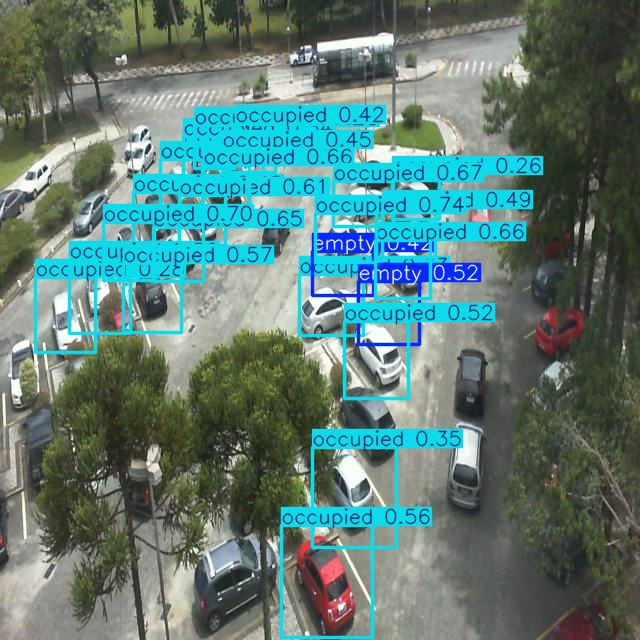

In [18]:
from IPython.display import Image, display

# Display the image
display(Image(filename='/content/runs/detect/image_inference3/image1.jpg'))


In [24]:
model.export(format="onnx")

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/content/results_parkvideo/car_detection/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 6.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.57...
ONNX: export success ✅ 9.5s, saved as '/content/content/results_parkvideo/car_detection/weights/best.onnx' (42.7 MB)

Export complete (10.6s)
Results saved to /content/content/results_parkvideo/car_detection/weights
Predict:         yolo predict task=d

'/content/content/results_parkvideo/car_detection/weights/best.onnx'

In [26]:
!pip install onnxruntime-gpu


In [29]:
import onnxruntime
import cv2
import numpy as np
import time

# Load ONNX model with GPU execution provider
session = onnxruntime.InferenceSession(
    '/content/content/results_parkvideo/car_detection/weights/best.onnx',
    providers=['CUDAExecutionProvider']
)

print("Execution providers:", session.get_providers())

input_name = session.get_inputs()[0].name

img = cv2.imread('/content/image1.jpg')
img_resized = cv2.resize(img, (640, 640))
img_input = img_resized.transpose(2, 0, 1).astype(np.float32)
img_input = np.expand_dims(img_input, axis=0) / 255.0

# Warm-up
for _ in range(5):
    session.run(None, {input_name: img_input})

# Measure inference time
start = time.time()
for _ in range(30):
    session.run(None, {input_name: img_input})
end = time.time()

fps = 30 / (end - start)
print(f"Inference FPS on GPU: {fps:.2f}")


Execution providers: ['CUDAExecutionProvider', 'CPUExecutionProvider']
Inference FPS on GPU: 63.96


#Human Activity detection